In [17]:
from scipy.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from sklearn.cluster import KMeans
from scipy.sparse import csc_matrix, csr_matrix
from sklearn.preprocessing import normalize, Normalizer, MaxAbsScaler, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)

df = pd.read_csv('data/seeds-width-vs-length.csv')

grains = df.values

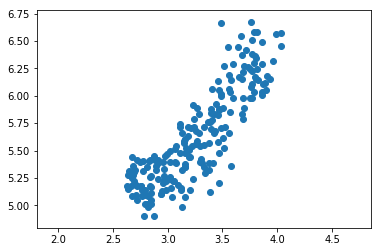

0.8604405325922295


In [2]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

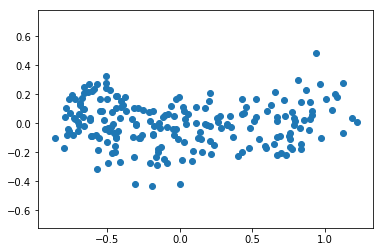

-0.000000


In [3]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print('{:f}'.format(correlation))

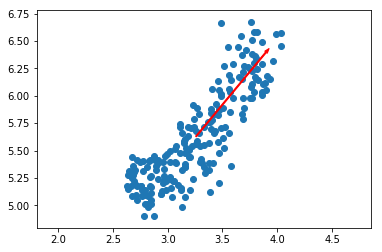

In [4]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

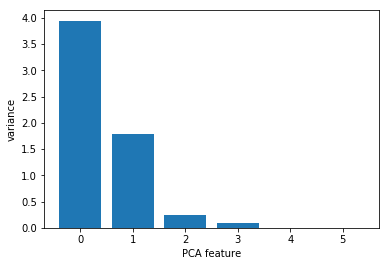

In [5]:
df1 = pd.read_csv('data/fish.csv',header=None)

fsamp = df1.iloc[:,1:].values

#print(fsamp)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(fsamp)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [8]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(fsamp)

# Transform the scaled samples: pca_features
pca_features = pca.transform(fsamp)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [4]:
#sample text
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [8]:
#Using sparse matrix

df2 = pd.read_csv('data/wiki/wikipedia-vectors.csv')

titles = df2.iloc[:,1:].columns.values

row = df2.iloc[:,1:].values
mat = csc_matrix(row)

mat = np.transpose(mat)
articles = mat.tocsr()

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
14      0                                 Climate change
19      0  2007 United Nations Climate Change Conference
18      0  2010 United Nations Climate Change Conference
17      0  Greenhouse gas emissions by the United States
16      0                                        350.org
15      0                                 Kyoto Protocol
13      0                               Connie Hedegaard
12      0                                   Nigel Lawson
11      0       Nationally Appropriate Mitigation Action
10      0                                 Global warming
0       1                                       HTTP 404
8       1                                        Firefox
7       1                                  Social search
6       1                    Hypertext Transfer Protocol
5       1                                         Tumblr
4       1                                  Google Search
3       1                      

In [9]:
#another dimension reduction technique is Non-negative matrix factorization.
#NMF models are easier to comprehend
# NMF is only applied to dataset where features and the samples are non-negative
# Tf - frequency of word in document
# idf - reduce influence of frequent words

In [10]:
# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40428248e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66557364e-01]
 [3.82072298e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98612951e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81707627e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85476561e-01]
 [1.29295304e-02 1.37891477e-02 7.76328572e-03 3.34528933e-02
  0.00000000e+00 3.34494089e-01]
 [0.00000000e+00 0.00000000e+00 2.06744190e-02 0.00000000e+00
  6.04435291e-03 3.59030736e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90935722e-01]
 [1.54279850e-02 1.42819541e-02 3.76638250e-03 2.37142075e-02
  2.62597089e-02 4.80733985e-01]
 [1.11742510e-02 3.13682119e-02 3.09487941e-02 6.57083272e-02
  1.96659673e-02 3.38260615e-01]
 [0.00000000e+00 0.00000000e+00 5.30723700e-01 0.0

In [11]:
# Create a pandas DataFrame: df
df4 = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df4.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df4.loc['Denzel Washington'])

#third feature has the highest value

0    0.003846
1    0.000000
2    0.000000
3    0.575784
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422434
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [12]:
words = []
file = open('data/wiki/wikipedia-vocabulary-utf8.txt', 'r')
for f in file:
    words.append(f)

# Create a DataFrame: components_df
components_df = pd.DataFrame(data=model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film\n       0.627796
award\n      0.253099
starred\n    0.245253
role\n       0.211424
actress\n    0.186374
Name: 3, dtype: float64


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


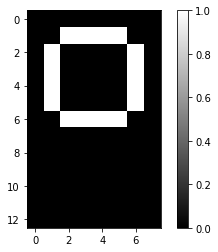

In [13]:
dig = pd.read_csv('data/lcd-digits.csv')
samples = np.array(dig)

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13,8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

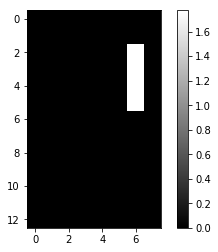

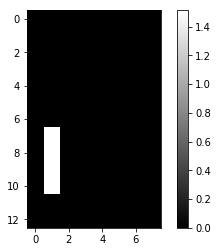

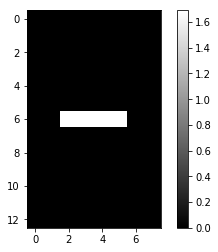

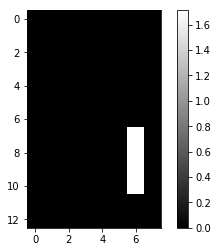

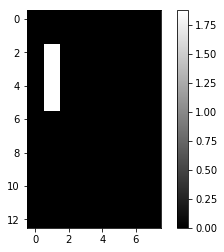

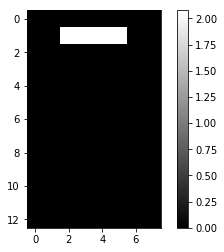

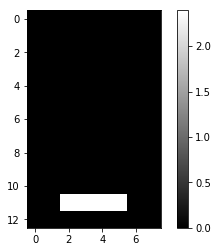

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [14]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    bitmap = component.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

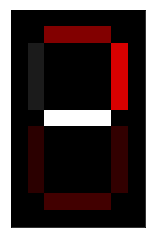

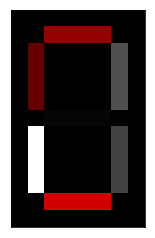

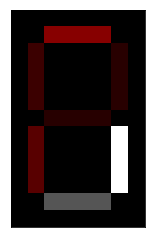

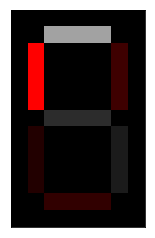

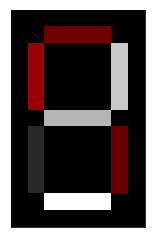

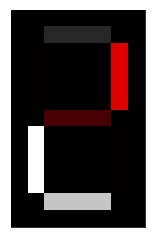

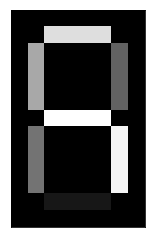

In [15]:
# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    bitmap = component.reshape((13, 8))  # make a square array
    bitmap /= np.abs(component).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [16]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df5 = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df5.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df5.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64
